<a href="https://colab.research.google.com/github/philipjpark/P_Park_Quiz4/blob/main/P_ParkQuiz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Factors Affecting Mortgage Loan Approval#

## Part 1: Introduction ##

The process of securing a home can be an exciting one but also quite stressful. Applying for home mortgage loans is highly regulated by the banking industry. Many factors are considered when approving loans for home-owning candidates but there have been allegations of racial discrimination and other forms of discriminatory impropriety and thus regulators have decided to take a fresh look to see if there is merit to these allegations. The task at hand, is to identify any correlations between loan denials and racial discrimination. 
(Please refer to : https://www.wbur.org/news/2022/03/30/home-loans-mortgages-boston-denials) 
     

**Statement of the Problem:** Compare/contrast binary logistic regression models to predict whether or not it is likely that a mortgage loan application will be denied. Parse through the data and models to idenitfy the factors that greatly impact the approval or denial of a loan application. 



#Exploratory Data Analysis#
There are 13 attributes within this dataset:

**dir:** Debt payments to total income ratio

**hir:** Housing expenses to income ratio

**lvr:** Ratio of size of loan to assessed value of property

**ccs:** Consumer credit score from 1 to 6 (a low value being a good score)

**mcs:** Mortgage credit score from 1 to 4 (a low value being a good score)

**pbcr:** Does the prospective loanee have a public bad credit record? 

**dmi:** Was the prospective loanee denied mortgage insurance? 

**self:** Self-employed 

**single:** Is the applicant single? 

**uria:** 1989 Massachusetts unemployment rate in the applicant's industry

**condominium:** Is unit a condominium?

**black:** Is the applicant black?

**deny:** Has the mortgage been denied? 

Inferentially-speaking, the dir and lvr may have a strong correlation with the result of the loan application. Debt payments and larger-than-usual loan requests may be red flags for banks. The role of race and loan denials is obviously something that I am interested in analyzing as the data prep and subsequent modeling progresses. 

Source of the dataset: 

https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html

#Data Preparation#

The first step was to get the raw data and I accomplished this by uploading it into my repository. Then I imported a sufficient amount of libraries in order to utilize the power of Python, so that I can leverage these tools as a novice in this field. The tools are useful because they can help me ease into the process of analyzing and modeling and I hope to reduce the library usage in the future, so that I can refine my skills. 

I called on data.describe() and data.head() to get some preliminary information. 

In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN


data = pd.read_csv("https://raw.githubusercontent.com/philipjpark/P_Park_Quiz4/main/HDMA%20Boston%20Housing%20Data.csv")
data.describe()
data.head()



,number,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condominium,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


The next step was to drop the nulls, replace the nulls and then check to make sure the nulls are sufficiently addressed. 

In [51]:
data.fillna(value = 0,
          inplace = True)

names_of_columns = data.columns
for c in names_of_columns:
    print(c + '-' + str(data[c].isnull().sum()))

number -0
dir-0
hir-0
lvr-0
ccs-0
mcs-0
pbcr-0
dmi-0
self-0
single-0
uria-0
condominium-0
black-0
deny-0


Next, I needed to check for the different types of values for each categorical column. I needed to make sure that I have simply yes and no strings so that I can replace all of these with 1s and 0s. The reason why is because with a binary logistic regression, I need to have these two inputs. 

A **binary logisitic regression** is a great way to compare a response variable to a potentially influential factor to see if there is a correlation. A binary logistic regression will range from 0 to 1, and the curve is an S shape. The binary logistic regression will indicate the level of influence that a factor has with 1 being a definitive yes and 0 being a definitive no. Anything over 50% can be considered veering towards 1 (Yes) and anything below 50% can be considered veering towards 0 (No). 

In [52]:
pbcrVals = data.pbcr.value_counts()

dmiVals = data.dmi.value_counts()
selfVals = data.self.value_counts()
singleVals = data.single.value_counts()
condoVals = data.condominium.value_counts()
blackVals= data.black.value_counts()
denyVals= data.deny.value_counts()
print(dmiVals)
print(selfVals)
print(singleVals)
print(condoVals)
print(blackVals)
print(denyVals)

no     2333
yes      48
Name: dmi, dtype: int64
no     2103
yes     277
0         1
Name: self, dtype: int64
no     1444
yes     937
Name: single, dtype: int64
0    1695
1     686
Name: condominium, dtype: int64
no     2042
yes     339
Name: black, dtype: int64
no     2096
yes     285
Name: deny, dtype: int64


#Prepped Data Work#

Once I identified the values, I was able to use the replace method to make all of the values 0s and 1s to correspond to no and yes. This was the most important step prior to creating my models for the binary logisitic regression. 


In [53]:
df = pd.DataFrame(data['pbcr'])
df1 = pd.DataFrame(data['dmi'])
df2 = pd.DataFrame(data['self'])
df3 = pd.DataFrame(data['single'])
df4 = pd.DataFrame(data['black'])
df5 = pd.DataFrame(data['deny'])


data['pbcr'] = df.replace({'yes' : 1,"no" : 0})
data['dmi'] = df1.replace({'yes' : 1,"no" : 0})
data['self'] = df2.replace({'yes': 1,"no" : 0})
data['single'] = df3.replace({'yes': 1,"no" : 0})
data['black'] = df4.replace({'yes': 1,"no" : 0})
data['deny'] = df5.replace({'yes': 1,"no" : 0})


print(data.pbcr.value_counts())
print(data.dmi.value_counts())
print(data.self.value_counts())
print(data.single.value_counts())
print(data.black.value_counts())
print(data.deny.value_counts())







0    2206
1     175
Name: pbcr, dtype: int64
0    2333
1      48
Name: dmi, dtype: int64
0    2104
1     277
Name: self, dtype: int64
0    1444
1     937
Name: single, dtype: int64
0    2042
1     339
Name: black, dtype: int64
0    2096
1     285
Name: deny, dtype: int64


Next, I called on a correlation matrix, to sift and sort some more data. 

According to: https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp#:~:text=A%20correlation%20of%20%2D1.0%20indicates,it%20is%20a%20negative%20relationship. 

"A correlation of -1.0 indicates a perfect negative correlation, and a correlation of 1.0 indicates a perfect positive correlation. If the correlation coefficient is greater than zero, it is a positive relationship. Conversely, if the value is less than zero, it is a negative relationship."

In [54]:
corr_matrix = data.corr()
corr_matrix

rs = np.random.RandomState(0)
dfWow = pd.DataFrame(rs.rand(14, 14))
corr = dfWow.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.211014,0.314649,-0.064384,0.041276,-0.082112,-0.246714,-0.092720,-0.148191,-0.272108,-0.123913,-0.199799,-0.061200,0.032905
1,-0.211014,1.000000,0.267418,0.203292,-0.065591,-0.276025,-0.068750,0.141150,0.448604,0.009730,0.364683,0.219198,-0.179906,0.035845
2,0.314649,0.267418,1.000000,-0.220827,0.047528,-0.367797,-0.017026,-0.455950,0.041402,-0.536480,0.110986,0.139670,0.072958,-0.112034
3,-0.064384,0.203292,-0.220827,1.000000,0.298544,0.111539,-0.140679,0.402256,0.444575,-0.012967,-0.119652,0.471061,-0.421886,0.311617
4,0.041276,-0.065591,0.047528,0.298544,1.000000,0.608096,-0.070982,0.485453,0.207039,0.045215,-0.565345,0.623650,-0.168425,0.504373
5,-0.082112,-0.276025,-0.367797,0.111539,0.608096,1.000000,-0.137431,0.747805,0.161254,0.173525,-0.554304,0.472956,0.274505,0.318667
6,-0.246714,-0.068750,-0.017026,-0.140679,-0.070982,-0.137431,1.000000,-0.080350,-0.123056,0.030180,0.065418,-0.109529,-0.041748,0.174139
7,-0.092720,0.141150,-0.455950,0.402256,0.485453,0.747805,-0.080350,1.000000,0.586567,0.431831,-0.178626,0.405889,-0.119448,0.403160
8,-0.148191,0.448604,0.041402,0.444575,0.207039,0.161254,-0.123056,0.586567,1.000000,0.156734,0.331005,0.525722,-0.209516,0.492889
9,-0.272108,0.009730,-0.536480,-0.012967,0.045215,0.173525,0.030180,0.431831,0.156734,1.000000,-0.045125,0.074935,-0.430240,0.025112


#Regression Modeling#

For the regression modeling, I used the Split Train Test. After doing extensive research, it seems to be a good test. As my skills develop and I have a better grasp of what to look for and how to interpret the findings, I hope to then utilize a plethora of models and tests in order to sufficiently predict and analyze the data.

The outputted number is 0.897 which seems to point to the fact that these factors do have an impact on the response variable of deny. Next, I will reduced the comparison pool to three variables. 

In [55]:

data2 = data[['pbcr','dmi', 'self', 'single','black', 'deny', 'condominium' ]]
print(data2.head())
X_train, X_test, y_train, y_test = train_test_split(data2.drop('deny',axis=1), data2['deny'], test_size=0.20, random_state=101)

model = LogisticRegression()
model.fit(X_train,y_train)

foresight = model.predict(X_test)

print(classification_report(y_test,foresight))
print(accuracy_score(y_test, foresight))

   pbcr  dmi  self  single  black  deny  condominium
0     0    0     0       0      0     0            0
1     0    0     0       1      0     0            0
2     0    0     0       0      0     0            0
3     0    0     0       0      0     0            0
4     0    0     0       0      0     0            0
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       426
           1       0.56      0.20      0.29        51

    accuracy                           0.90       477
   macro avg       0.73      0.59      0.62       477
weighted avg       0.87      0.90      0.87       477

0.8972746331236897


#Select Models#
Here I created a predictors array and populated it with some of the factors that I deemed to have a potential impact to the response variable. The outputted number was 0.901. I need to take a deep-dive into what these numbers mean and whether or not I set up the model correctly. 

In [56]:
train= data[['pbcr','dmi', 'self', 'single','black', 'deny', 'condominium' ]]
test= data[['pbcr','dmi', 'self', 'single','black', 'deny', 'condominium' ]]

predictors = ['black', 'dmi', 'pbcr']

X_train = train[predictors].values
y_train = train['deny'].values

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

print(predictors)
model.coef_

0.9008819823603528
['black', 'dmi', 'pbcr']


array([[1.09331397, 3.74946923, 1.76090903]])

Here I varied up the predictors array with a different assortment of variables and tested it to the response variable. The 0.897 output has to be analyzed more as I improve my comprehension of these models and data. 

In [57]:
train= data[['pbcr','dmi', 'self', 'single','black', 'deny', 'condominium' ]]
test= data[['pbcr','dmi', 'self', 'single','black', 'deny', 'condominium' ]]

predictors = ['pbcr', 'dmi', 'single']

X_train = train[predictors].values
y_train = train['deny'].values

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

print(predictors)
model.coef_

0.8971020579588408
['pbcr', 'dmi', 'single']


array([[1.95092596, 3.78119467, 0.50353145]])

Lastly, I ran another test with another variation of variables; and tested it to the response variable. The output is 0.887. I am fascinated to figure out what these numbers mean within the context of how mortgage loans are affected. 

In [58]:
train= data[['pbcr','dmi', 'self', 'single','black', 'deny', 'condominium' ]]
test= data[['pbcr','dmi', 'self', 'single','black', 'deny', 'condominium' ]]

predictors = ['single', 'pbcr', 'black']

X_train = train[predictors].values
y_train = train['deny'].values

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

print(predictors)
model.coef_

0.887022259554809
['single', 'pbcr', 'black']


array([[0.40956243, 1.77443632, 1.08086312]])

##Logistic Regression Curves##

Here are a bevy of logistic regression curves that can be used to visualize some of the features as compared to the response variable. 

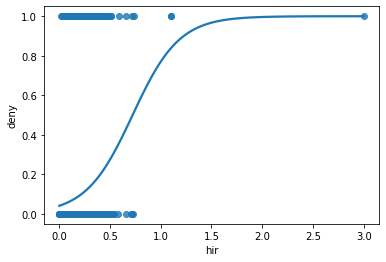

In [59]:
sns.regplot(x=data['hir'], y=data['deny'], data=data, logistic=True, ci=None)

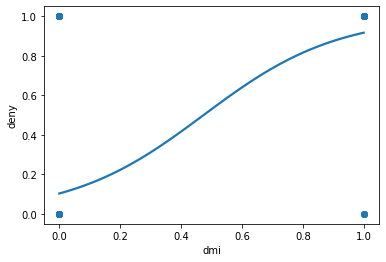

In [60]:
sns.regplot(x=data['dmi'], y=data['deny'], data=data, logistic=True, ci=None)

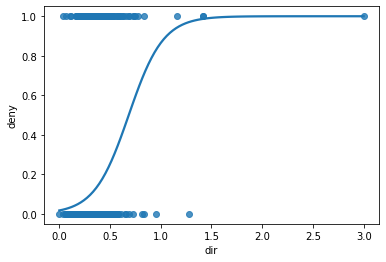

In [61]:
sns.regplot(x=data['dir'], y=data['deny'], data=data, logistic=True, ci=None)

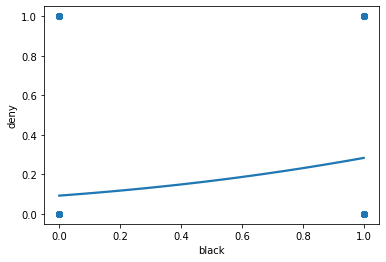

In [62]:
sns.regplot(x=data['black'], y=data['deny'], data=data, logistic=True, ci=None)

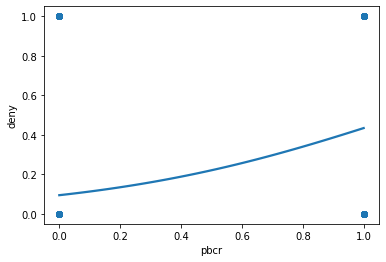

In [63]:
sns.regplot(x=data['pbcr'], y=data['deny'], data=data, logistic=True, ci=None)

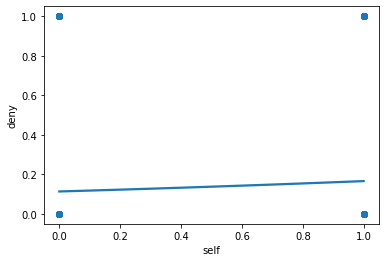

In [64]:
sns.regplot(x=data['self'], y=data['deny'], data=data, logistic=True, ci=None)

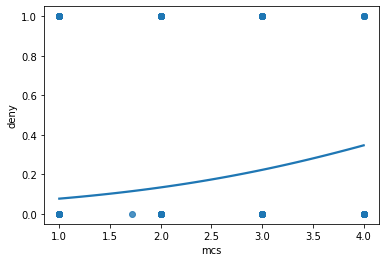

In [65]:
sns.regplot(x=data['mcs'], y=data['deny'], data=data, logistic=True, ci=None)

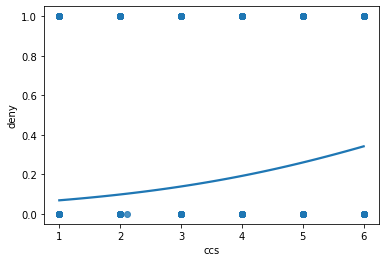

In [66]:
sns.regplot(x=data['ccs'], y=data['deny'], data=data, logistic=True, ci=None)

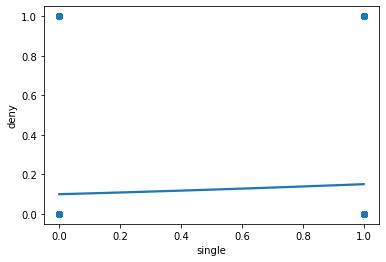

In [67]:
sns.regplot(x=data['single'], y=data['deny'], data=data, logistic=True, ci=None)

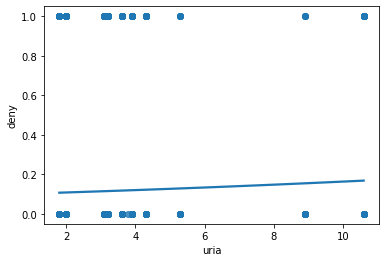

In [68]:
sns.regplot(x=data['uria'], y=data['deny'], data=data, logistic=True, ci=None)

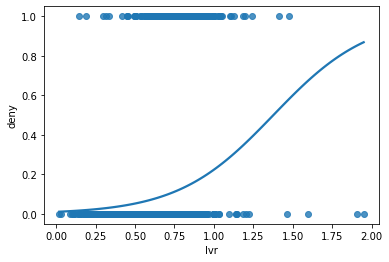

In [69]:
sns.regplot(x=data['lvr'], y=data['deny'], data=data, logistic=True, ci=None)

#Conclusion#

The findings seem to point in the direction of debt payments, housing expenses and the ratio of size of loan to assessed value of property as key factors in influencing loan approvals. Improving the models and data fluency is something that must be taken seriously as the consequences of these findings have a resounding impact on society. Much of my conclusions were based on the regression plots utilized at the end of this notebook, and thus, I feel as if there needs to be a lot more refinement in my skills to make sound judgement calls on the findings. I am striving for that to happen as soon as possible.

 As my data analytic skills improve, I am happy to continue fixing up this notebook because I am immensely dedicated in being objective and providing up-to-date and pragmatic ascertainments. 

##Resources:##
https://www.extendoffice.com/documents/excel/3341-excel-split-comma-separated-values.html

https://stackoverflow.com/questions/70787006/why-i-get-strange-error-when-trying-to-read-csv-file-in-colab

https://www.edureka.co/community/52956/sklearn-cross-validation-import-train-test-split-not-working

https://www.youtube.com/watch?v=UBKImHIc6PI&t=8s

https://datatofish.com/replace-values-pandas-dataframe/

https://www.statology.org/how-to-read-a-correlation-matrix/

https://www.geeksforgeeks.org/how-to-convert-categorical-data-to-binary-data-in-python/

https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe

https://www.analyticsvidhya.com/blog/2022/02/logistic-regression-using-python-and-excel/


https://sites.google.com/view/vinegarhill-datalabs/data-transformation-and-visualization/tidyverse-r/boston-hmda

https://pythonbasics.org/split-train-test/

https://realpython.com/logistic-regression-python/

https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

https://stackoverflow.com/questions/58003161/python-pandas-column-to-replace-string-boolean-values-to-actual-boolean-type

https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Logistic%20Regression%20in%20Python%20-%20Step%20by%20Step.ipynb

https://www.youtube.com/watch?v=VCJdg7YBbAQ (Logistic Regression in Python)

https://www.youtube.com/watch?v=yIYKR4sgzI8 (StatQuest: Logistic Regression)